In [1]:
import os
EXPERIMENT_DIR =  os.path.abspath(os.getcwd()) + '/calibration_logs/'
EXPERIMENT_DIR

'/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/'

## Data proc

In [2]:
%matplotlib widget


import os
from enum import Enum

import json

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


class PlotSize(Enum):
    HALF_SCREEN = 8
    FULL_SCREEN = 16


class VehicleLogViz():

    def __init__(self, path = None):
        
        self._path_to_vehicle_log_file = path or self.pars_arguments().file_path
        self._filename = os.path.basename(self._path_to_vehicle_log_file)

        self.vehicle_log = self.load_vehicle_log_from_file()

        self.fig, self.ax = plt.subplots(1, 1, figsize=[PlotSize.HALF_SCREEN.value, 8.0], facecolor='#E0E0E0')#, axisbg='black')
        plt.subplots_adjust(bottom=0.05, right=0.98, top=0.96, left=0.04)
        self.ax.axhline(y=0, color='k')
        self.ax.axvline(x=0, color='k')
        self.ax.grid(True, which='both')

        self.ax.set_xlabel('time, [s]')
        self.ax.set_ylabel('data')

        plt.title(self._path_to_vehicle_log_file)

        self.sw_angle_plot, = self.ax.plot([], [],      color="#483D8B", lw=2, ls=':', label='sw_angle [ang]')
        self.sw_torque_plot, = self.ax.plot([], [],     color="#8000FF", lw=2, ls='-', label='sw_torque')
        self.vehicle_speed_plot, = self.ax.plot([], [], color="#FFFF00", lw=2, ls='-', label='vehicle_speed [cm/s]')
        self.line_plot, = self.ax.plot([], [],          color="#FFA500", lw=1, ls='-', label='aprox')

        # step_response_info
        self._tan = None
        self._torque = None


    def load_vehicle_log_from_file(self):

        try:
            log_file_handler = open(self._path_to_vehicle_log_file, 'r')

        except Exception as err:
            print("Can't open file " + self._path_to_vehicle_log_file + ". " + str(err))

        try:
            vehicle_log_data = json.load(log_file_handler)

        except Exception as err:
            print("Can't load log from file " + self._path_to_vehicle_log_file + ". " + str(err))

        log_file_handler.close()

        return vehicle_log_data
    

    def plot_vehicle_log(self, tmin = float('-inf'), tmax = float('inf')):

        t = []
        sw_angle = []
        torque_cmd = []
        vehicle_speed = []

        for element in self.vehicle_log["data"]:
            
            # clamp data
            time = float(element['t'])
            if time < tmin or time > tmax:
                continue

            t.append(time)
            sw_angle.append(float(element['sw_angle']))
            torque_cmd.append(float(element['torque_cmd']) * 10)
            vehicle_speed.append(float(element['vehicle_speed']) * 100)

        # find start of approximation - angle change > 2 deg
        angle_start = sw_angle[0] 

        start_idx = 0
        for idx, el in enumerate(sw_angle):

            if abs(el - angle_start) > 2:   # magic number  #TODO
                start_idx = idx 
                break

        # approximation
        popt, _ = curve_fit(objective, t[start_idx:], sw_angle[start_idx:])
        tan, b_ang = popt
        print('y1 = %.5f * x + %.5f' % (tan, b_ang))

        approx_data = []
        for idx in range(start_idx, len(t)):
            approx_data.append( objective(t[idx], tan, b_ang) )
        
        self.line_plot.set_data(t[start_idx:], approx_data)

        # set step_response_info
        self._tan = tan
        self._torque = torque_cmd[len(torque_cmd) // 2]
        print( self.get_step_response_info()  )
 
        self.sw_angle_plot.set_data(t, sw_angle)
        self.sw_torque_plot.set_data(t, torque_cmd)

        self.ax.relim()      # make sure all the data fits
        self.ax.autoscale()

        plt.show()


    def save(self, fname = None):
        if not fname : fname = str(self._filename[:-4])
        plt.savefig('.' + str(fname) + '.png')


    def get_step_response_info(self):
        return self._torque, self._tan
    

# define the true objective function for approximation
def objective(x, a, b):
	return a * x + b

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
LUT = dict()

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/50.log
y1 = 0.00000 * x + -1.00000
(50.0, 6.969769742342352e-10)


/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/200.log
y1 = -0.01131 * x + -2.93696
(200.0, -0.011305493283703116)


/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/150.log
y1 = 0.00000 * x + -2.00000
(150.0, 4.6352975019106556e-10)


/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-350.log
y1 = -164.24781 * x + -23.17286
(-350.0, -164.24780925343245)


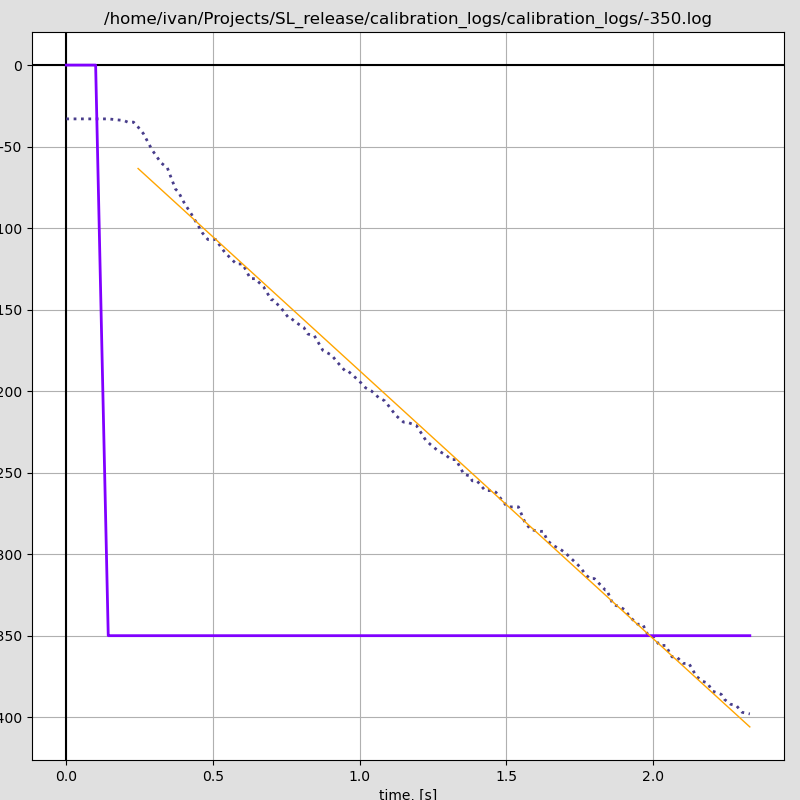

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-200.log
y1 = -0.90396 * x + -73.98436
(-200.0, -0.9039626157880127)


/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-150.log
y1 = -1.63015 * x + -65.01234
(-150.0, -1.6301529968886115)


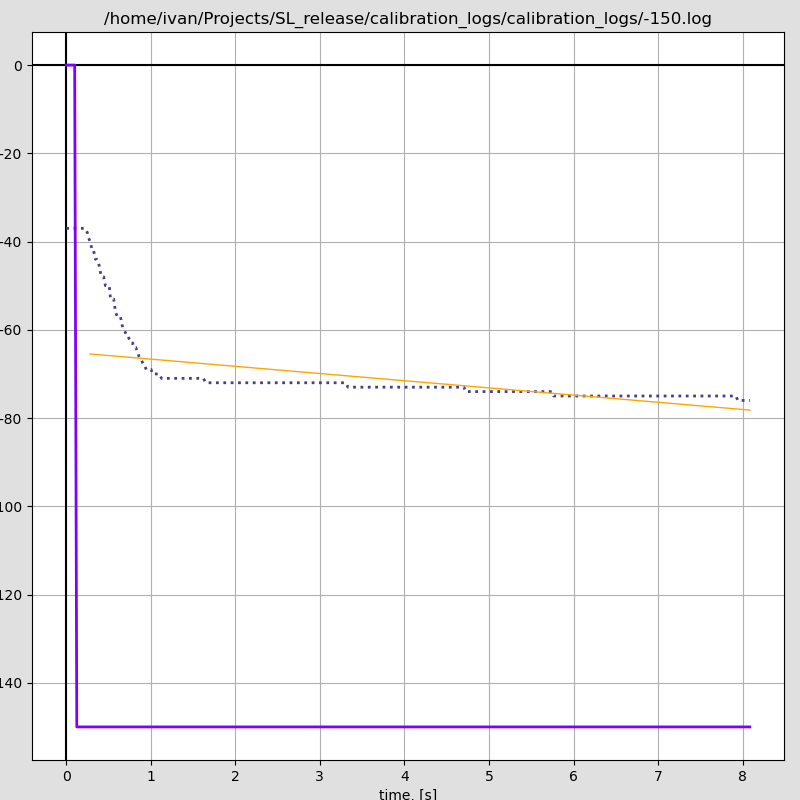

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-550.log
y1 = -466.67038 * x + 71.16977
(-550.0, -466.67037782208246)


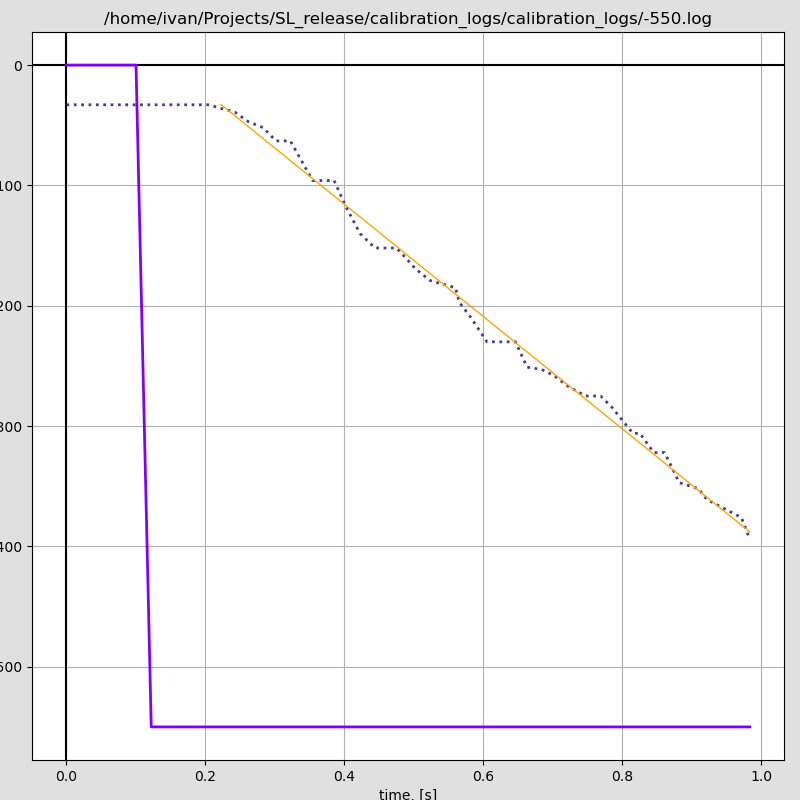

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/450.log
y1 = 321.44914 * x + -29.83781
(450.0, 321.4491403434804)


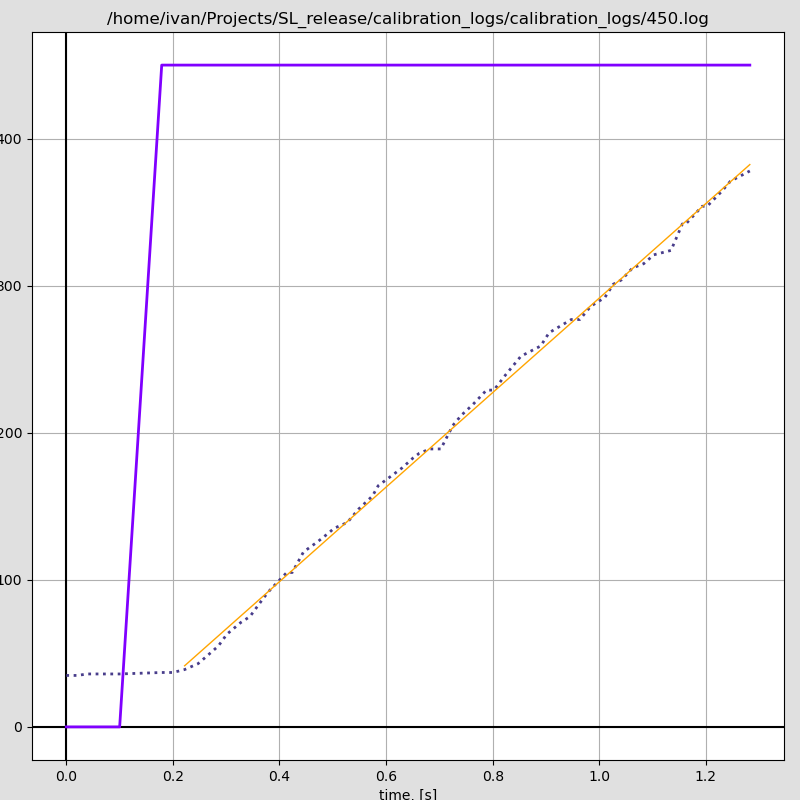

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/500.log
y1 = 431.95933 * x + -54.05993
(500.0, 431.9593282584418)


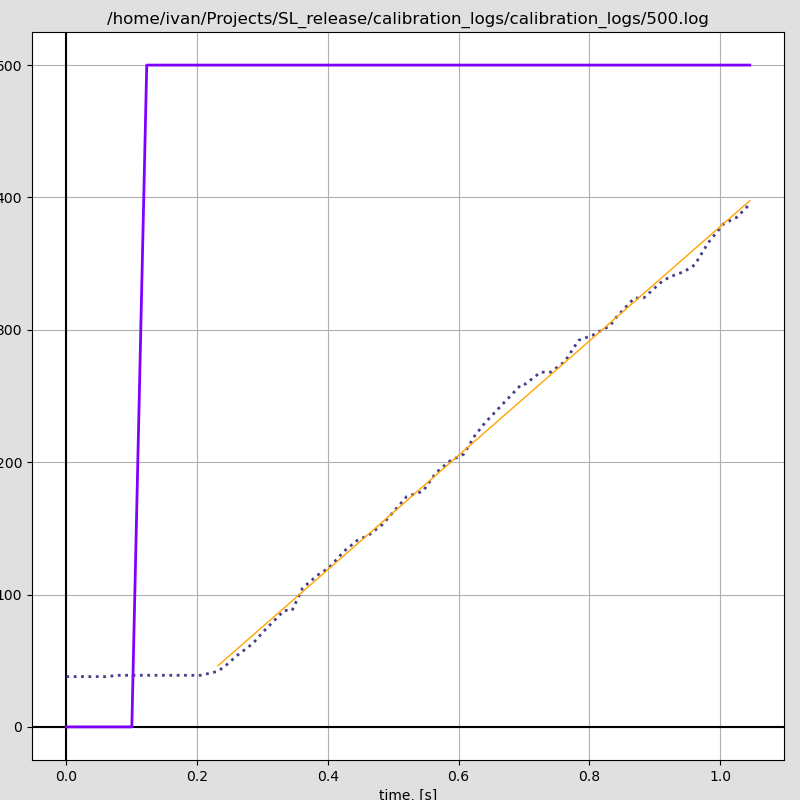

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-100.log
y1 = -0.25338 * x + -14.55090
(-100.0, -0.25337576892801206)


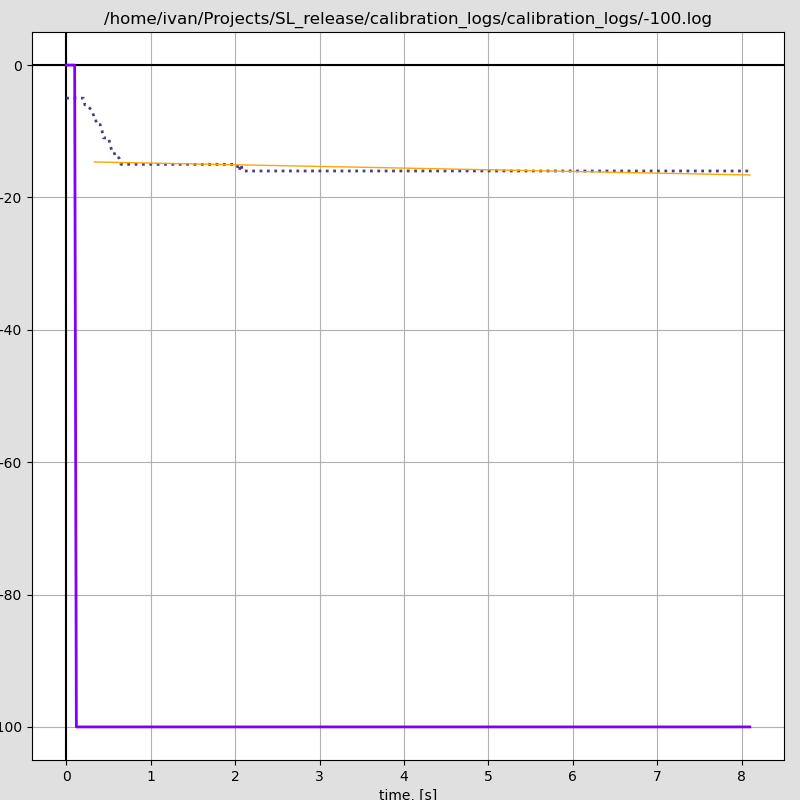

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-400.log
y1 = -313.68730 * x + 45.26079
(-400.0, -313.6873033624254)


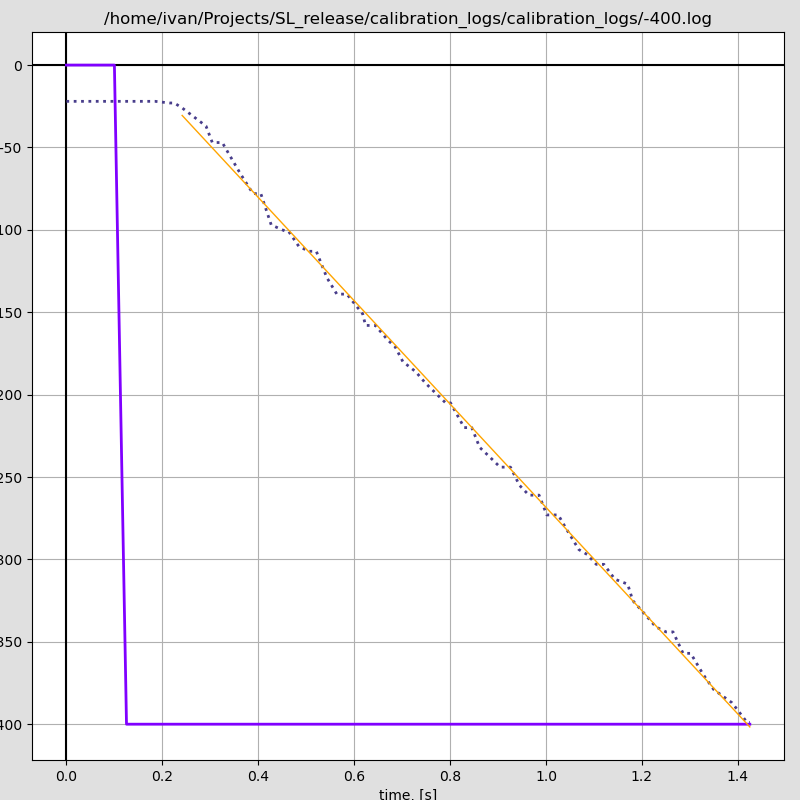

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-500.log
y1 = -432.96356 * x + 59.36319
(-500.0, -432.9635645839076)


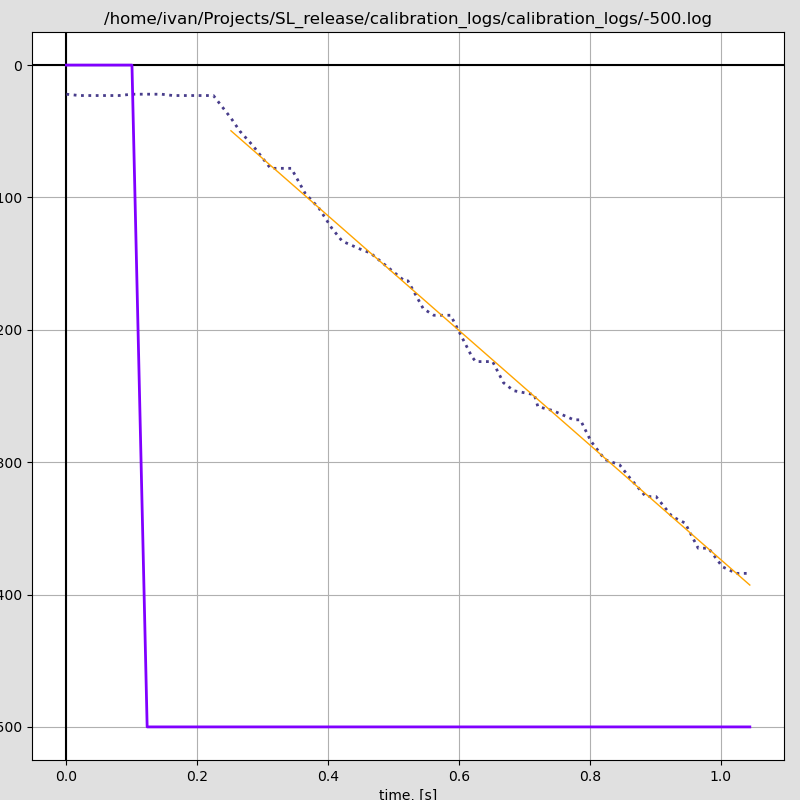

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/400.log
y1 = 188.71651 * x + 12.42336
(400.0, 188.71651103475472)


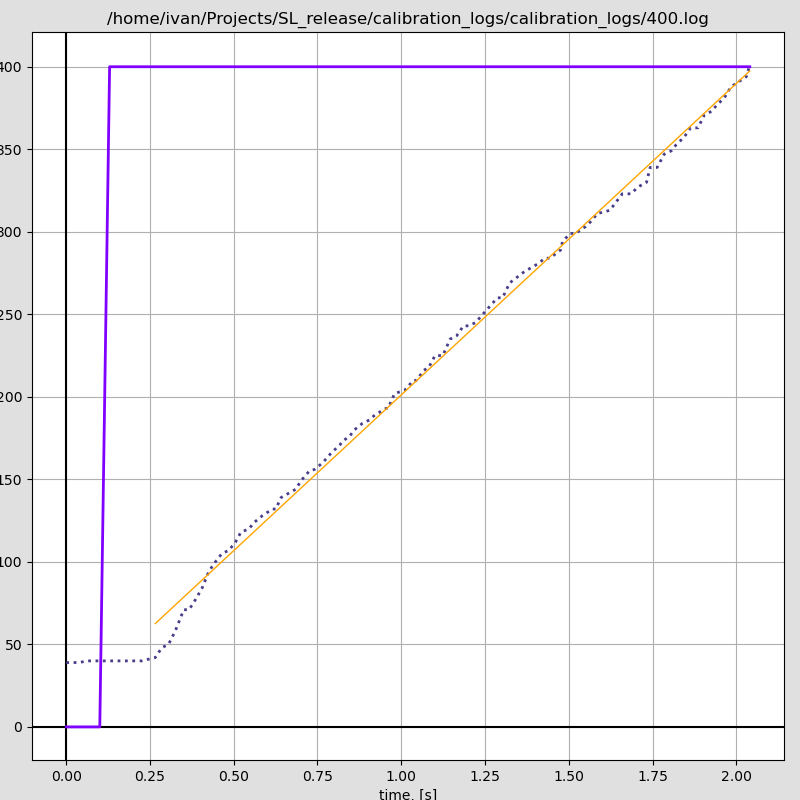

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/350.log
y1 = 51.21084 * x + 5.82900
(350.0, 51.210840212276224)


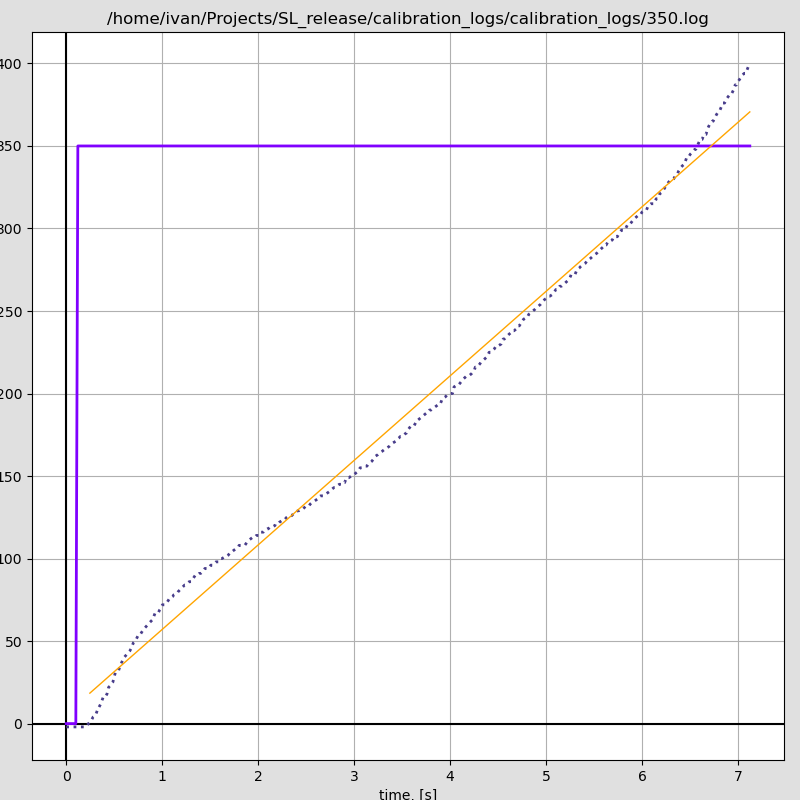

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/250.log
y1 = 0.20576 * x + -2.38809
(250.0, 0.20576448897212907)


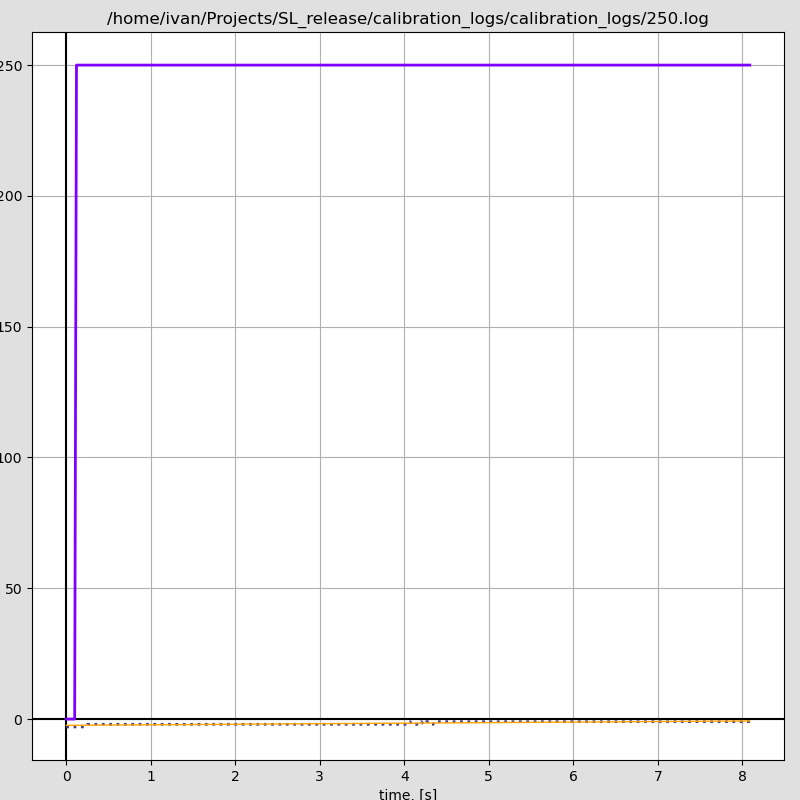

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-50.log
y1 = -0.34980 * x + 11.86275
(-50.0, -0.3498003947726991)


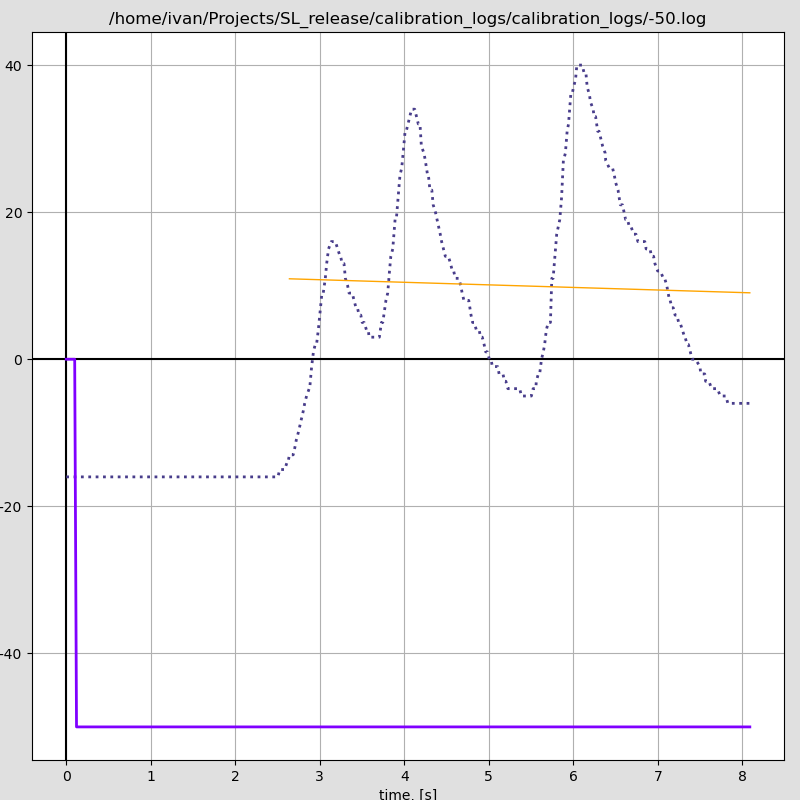

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/100.log
y1 = 0.00000 * x + -2.00000
(100.0, 1.1652088375417728e-09)


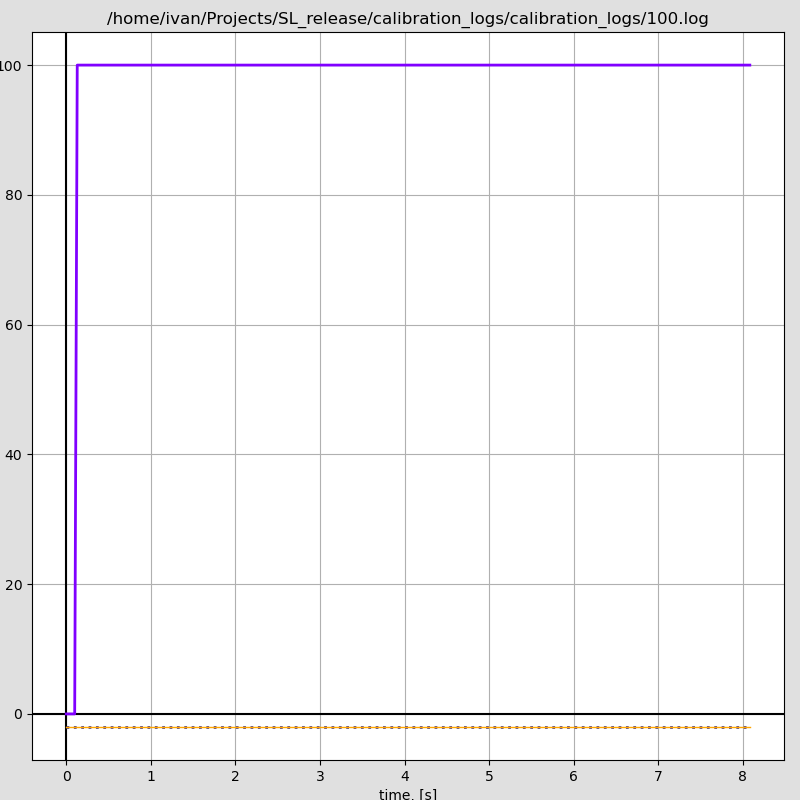

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-600.log
y1 = -466.20086 * x + 112.32549
(-600.0, -466.2008554756082)


/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/300.log
y1 = 2.16080 * x + 31.77239
(300.0, 2.1607955688838008)


/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-300.log
y1 = -44.83366 * x + -79.85633
(-300.0, -44.83366089089592)


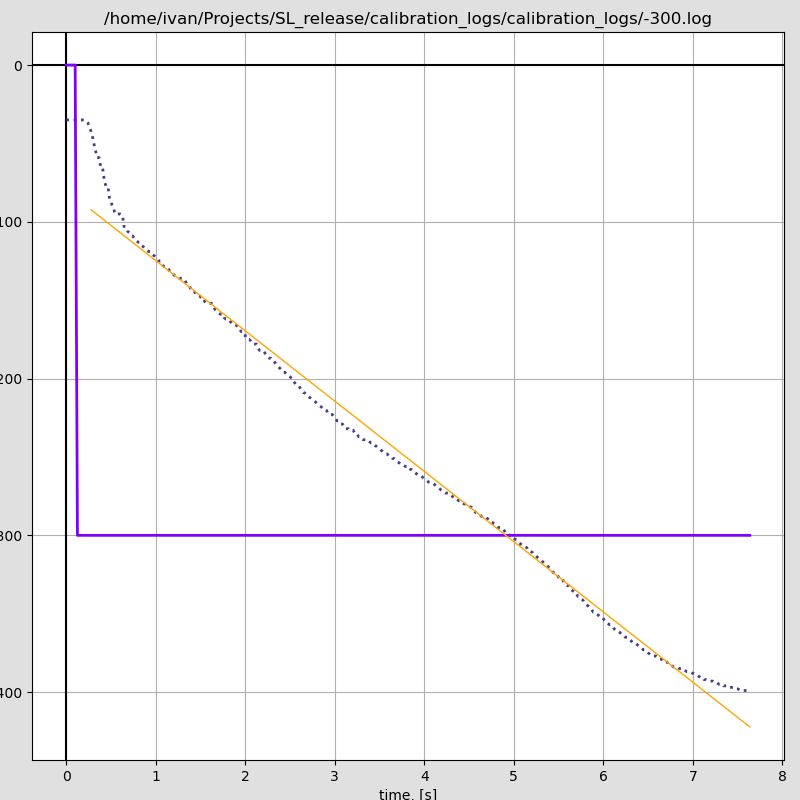

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/0.log
y1 = -0.00000 * x + -7.00000
(0.0, -7.40330588204803e-10)


/tmp/ipykernel_49870/1142687653.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots(1, 1, figsize=[PlotSize.HALF_SCREEN.value, 8.0], facecolor='#E0E0E0')#, axisbg='black')


/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-250.log
y1 = -1.42957 * x + -90.06429
(-250.0, -1.4295658780794138)


/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/600.log
y1 = 504.57355 * x + -65.01089
(600.0, 504.5735515810624)


/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/550.log
y1 = 486.91934 * x + -66.00623
(550.0, 486.91933621629835)


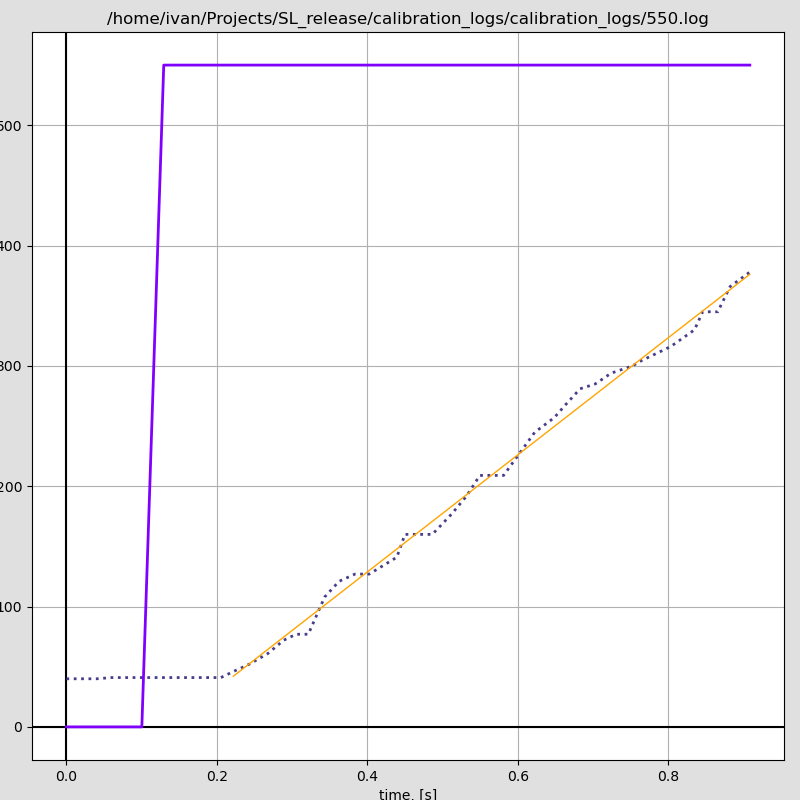

/home/ivan/Projects/SL_release/calibration_logs/calibration_logs/-450.log
y1 = -401.28783 * x + 75.70972
(-450.0, -401.2878305744243)


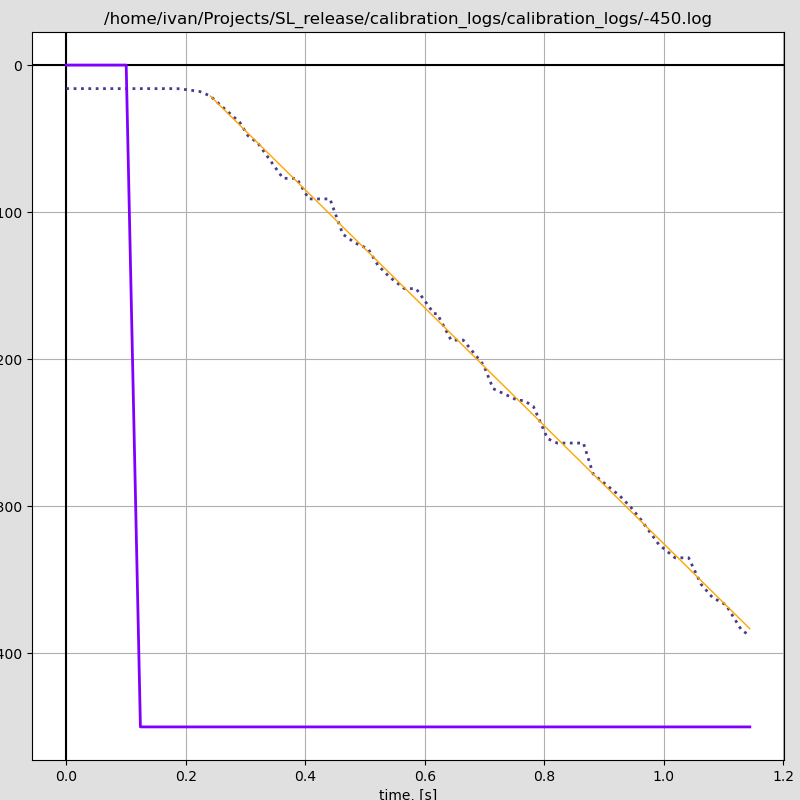

In [4]:
import os

files = [EXPERIMENT_DIR + el for el in os.listdir(EXPERIMENT_DIR)]

for path in files:
    print(path)
    
    viz = VehicleLogViz(path)
    viz.plot_vehicle_log()

    torq, tan = viz.get_step_response_info()

    LUT.update({torq: tan})


# save to file
with open('lut.txt', 'w+') as file:
    for key, value in LUT.items():
        file.write(f'{value} {key}\n')
        

# Result

In [5]:
import numpy as np

In [6]:
LUT

{50.0: 6.969769742342352e-10,
 200.0: -0.011305493283703116,
 150.0: 4.6352975019106556e-10,
 -350.0: -164.24780925343245,
 -200.0: -0.9039626157880127,
 -150.0: -1.6301529968886115,
 -550.0: -466.67037782208246,
 450.0: 321.4491403434804,
 500.0: 431.9593282584418,
 -100.0: -0.25337576892801206,
 -400.0: -313.6873033624254,
 -500.0: -432.9635645839076,
 400.0: 188.71651103475472,
 350.0: 51.210840212276224,
 250.0: 0.20576448897212907,
 -50.0: -0.3498003947726991,
 100.0: 1.1652088375417728e-09,
 -600.0: -466.2008554756082,
 300.0: 2.1607955688838008,
 -300.0: -44.83366089089592,
 0.0: -7.40330588204803e-10,
 -250.0: -1.4295658780794138,
 600.0: 504.5735515810624,
 550.0: 486.91933621629835,
 -450.0: -401.2878305744243}

In [7]:
LUT

dict(sorted(LUT.items(), key=lambda item: item[0]))

{-600.0: -466.2008554756082,
 -550.0: -466.67037782208246,
 -500.0: -432.9635645839076,
 -450.0: -401.2878305744243,
 -400.0: -313.6873033624254,
 -350.0: -164.24780925343245,
 -300.0: -44.83366089089592,
 -250.0: -1.4295658780794138,
 -200.0: -0.9039626157880127,
 -150.0: -1.6301529968886115,
 -100.0: -0.25337576892801206,
 -50.0: -0.3498003947726991,
 0.0: -7.40330588204803e-10,
 50.0: 6.969769742342352e-10,
 100.0: 1.1652088375417728e-09,
 150.0: 4.6352975019106556e-10,
 200.0: -0.011305493283703116,
 250.0: 0.20576448897212907,
 300.0: 2.1607955688838008,
 350.0: 51.210840212276224,
 400.0: 188.71651103475472,
 450.0: 321.4491403434804,
 500.0: 431.9593282584418,
 550.0: 486.91933621629835,
 600.0: 504.5735515810624}

/tmp/ipykernel_49870/1367777871.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-ro" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(torque, tang, '-ro', color="#483D8B", lw=2, ls=':', label='tang(torque)')
/tmp/ipykernel_49870/1367777871.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(torque, tang, '-ro', color="#483D8B", lw=2, ls=':', label='tang(torque)')


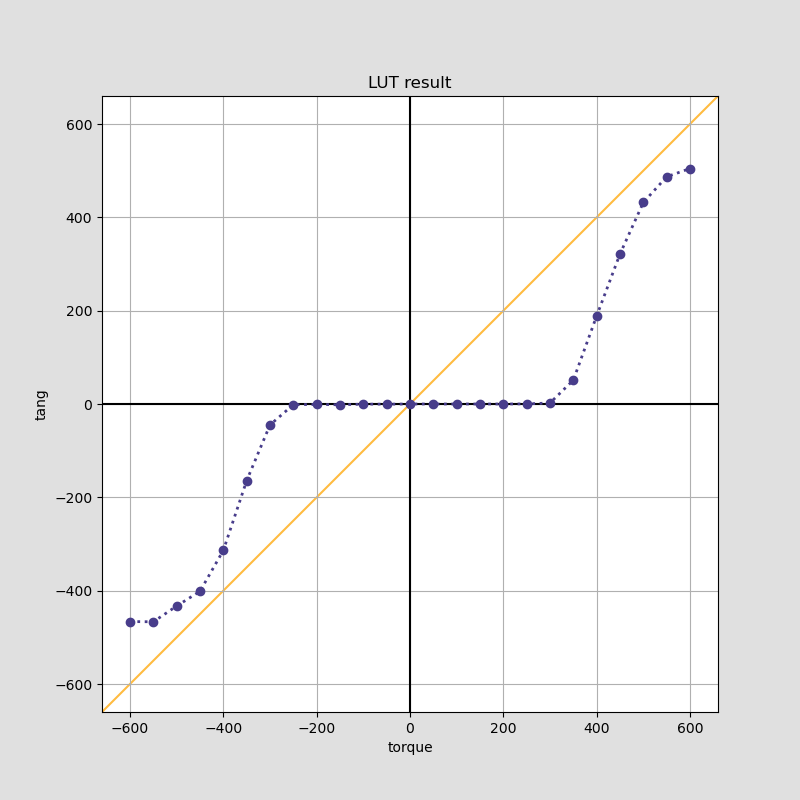

In [8]:
fig, ax = plt.subplots(1, 1, figsize=[PlotSize.HALF_SCREEN.value, 8.0], facecolor='#E0E0E0')


ax.set_xlabel('torque')
ax.set_ylabel('tang')

plt.title("LUT result") 
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')

# LUT result
torque, tang = zip(*(sorted(LUT.items())))
ax.plot(torque, tang, '-ro', color="#483D8B", lw=2, ls=':', label='tang(torque)')

# line y = x
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
]

ax.plot(lims, lims, '#FFA500', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.show()